# Testing fasterrcnn_resnet50_fpn

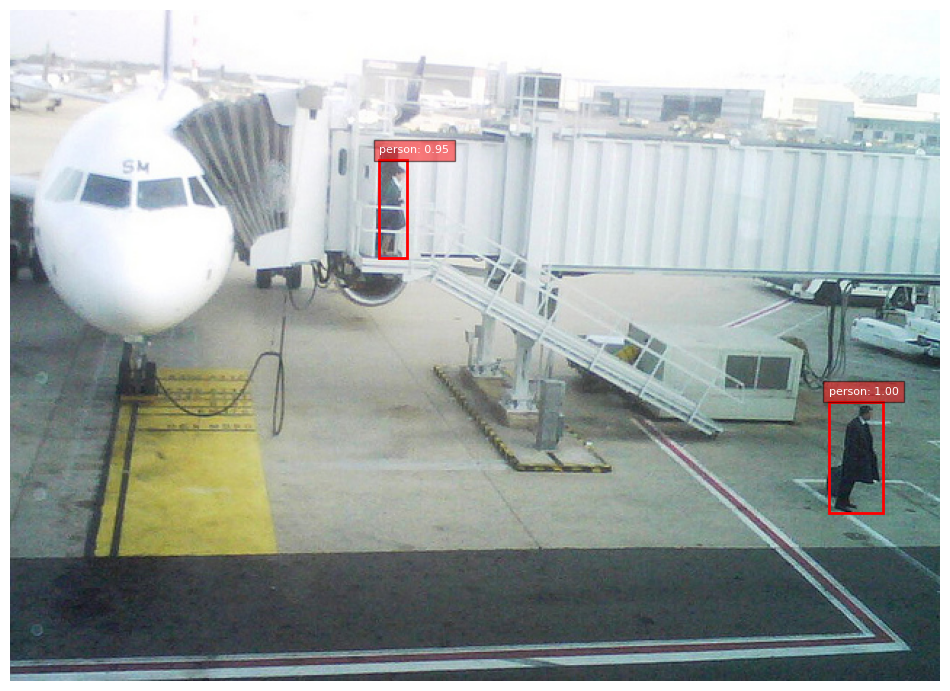

Detected 2 objects.


In [5]:
import torch
from torchvision import models, transforms
import matplotlib.pyplot as plt
from PIL import Image

# COCO class labels
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A',
    'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Load pre-trained Faster R-CNN model
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Define image pre-processing transform
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load a local image
image_path = 'data/COCO/images/val2017/000000348881.jpg'  # Replace with the path to your local image
image = Image.open(image_path)

# Pre-process the image
input_image = transform(image).unsqueeze(0)

# Perform object detection
with torch.no_grad():
    prediction = model(input_image)

# Extract bounding boxes, labels, and scores from the prediction
boxes = prediction[0]['boxes']
labels = prediction[0]['labels']
scores = prediction[0]['scores']

# filter out only specific categories
target_indices = [i for i, label in enumerate(labels) if label == 1 ]
filtered_boxes = boxes[target_indices]
filtered_labels = labels[target_indices]
filtered_scores = scores[target_indices]

# Filter out detections based on a confidence threshold
threshold = 0.8
filtered_boxes = filtered_boxes[filtered_scores > threshold]
filtered_labels = filtered_labels[filtered_scores > threshold]
filtered_scores = filtered_scores[filtered_scores > threshold]

# Display the detected boxes and labels
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)
for box, label, score in zip(filtered_boxes, filtered_labels, filtered_scores):
    x_min, y_min, x_max, y_max = box
    rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, color='r', linewidth=2)
    ax.add_patch(rect)
    label_text = f"{COCO_INSTANCE_CATEGORY_NAMES[label]}: {score:.2f}"
    ax.text(x_min, y_min - 5, label_text, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')
plt.show()

# Print the number of detected objects
print(f"Detected {len(filtered_boxes)} objects.")


In [3]:
from pycocotools.coco import COCO

# Initialize the COCO API
annotation_file = 'data/COCO/annotations/instances_val2017.json'  # Path to the COCO annotations file
coco = COCO(annotation_file)

# Load the COCO categories (e.g., person, car, dog, etc.)
category_ids = coco.getCatIds()
categories = coco.loadCats(category_ids)
category_map = {cat['id']: cat['name'] for cat in categories}

# Map the detected labels to category names
detected_objects = [category_map.get(label.item(), 'Unknown') for label in filtered_labels]

# Print the detected object categories
print("Detected object categories:", detected_objects)


loading annotations into memory...
Done (t=0.70s)
creating index...
index created!
Detected object categories: ['person', 'motorcycle', 'person', 'bicycle', 'person']


# COCO Instance & Image Example

loading annotations into memory...
Done (t=0.84s)
creating index...
index created!


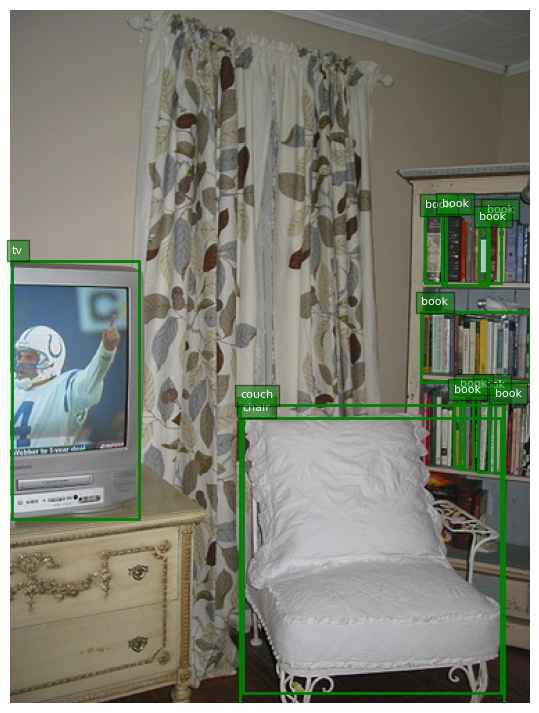

Number of ground-truth objects: 12


In [4]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

# Paths to COCO dataset
image_dir = 'data/COCO/images/val2017/'  # Directory containing COCO images
annotation_file = 'data/COCO/annotations/instances_val2017.json'  # Annotation JSON file

# Load COCO annotations
coco = COCO(annotation_file)

# Select an image by ID or randomly
image_id = 491497  # Example image ID (000000391895.jpg)
image_info = coco.loadImgs(image_id)[0]
image_path = f"{image_dir}/{image_info['file_name']}"

# Load the image
image = Image.open(image_path)

# Load ground-truth annotations for the selected image
annotations = coco.loadAnns(coco.getAnnIds(imgIds=image_id))

# Display the image with ground-truth bounding boxes
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

for annotation in annotations:
    # if annotation['category_id'] != 1: 
    #     continue

    # Extract bounding box (in COCO format: [x_min, y_min, width, height])
    x_min, y_min, width, height = annotation['bbox']
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='g', facecolor='none')
    ax.add_patch(rect)

    # Add class label
    category_id = annotation['category_id']
    category_name = coco.loadCats(category_id)[0]['name']
    ax.text(x_min, y_min - 5, category_name, color='white', fontsize=8, bbox=dict(facecolor='green', alpha=0.5))

plt.axis('off')
plt.show()

# Print the number of ground-truth objects
print(f"Number of ground-truth objects: {len(annotations)}")
